In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [39]:
path = "data/exp3/CIFAR10_cons_bi_v3_val.csv"
df = pd.read_csv(path)
df.head()
df[df == "MambaModel_s6_bi"] = "MambaModel_s6_BIMODULE"
df[df == "MambaModel_diagsequential_bi"] = "MambaModel_diag_BIMODULE"
print(df["Name"].value_counts())
#print(df.groupby("Name")["val acc"].mean()) 
print(df.groupby("Name")["test acc"].mean())
#print(df.head())

Name
MambaModel_s6_BIMODULE_placebo      6
MambaModel_s6_BIMODULE              6
MambaModel_diag_BIMODULE_placebo    5
MambaModel_diag_BIMODULE            5
MambaModel_diag                     5
MambaModel_s6                       5
Name: count, dtype: int64
Name
MambaModel_diag                     0.824600
MambaModel_diag_BIMODULE            0.828240
MambaModel_diag_BIMODULE_placebo    0.820240
MambaModel_s6                       0.782800
MambaModel_s6_BIMODULE              0.796483
MambaModel_s6_BIMODULE_placebo      0.786683
Name: val acc, dtype: float64
Name
MambaModel_diag                     0.824960
MambaModel_diag_BIMODULE            0.828160
MambaModel_diag_BIMODULE_placebo    0.822840
MambaModel_s6                       0.785600
MambaModel_s6_BIMODULE              0.800100
MambaModel_s6_BIMODULE_placebo      0.787533
Name: test acc, dtype: float64


In [29]:
df.groupby("Name")["val acc"].mean()
df.groupby("Name")["test acc"].mean()

Name
MambaModel_diag                     0.824960
MambaModel_diag_BIMODULE            0.828160
MambaModel_diag_BIMODULE_placebo    0.822840
MambaModel_s6                       0.785600
MambaModel_s6_BIMODULE              0.800100
MambaModel_s6_BIMODULE_placebo      0.787533
Name: test acc, dtype: float64

In [38]:
path = "data/exp3/IMDBtoken_bi_v3_val.csv"
df = pd.read_csv(path)
df.head()
df[df == "MambaModel_s6_bi"] = "MambaModel_s6_BIMODULE"
df[df == "MambaModel_diagsequential_bi"] = "MambaModel_diag_BIMODULE"
print(df["Name"].value_counts())
#print(df.groupby("Name")["val acc"].mean())
print(df.groupby("Name")["test acc"].mean())

Name
MambaModel_diag                     5
MambaModel_diag_BIMODULE_placebo    5
MambaModel_diag_BIMODULE            5
MambaModel_s6_BIMODULE_placebo      5
MambaModel_s6_BIMODULE              5
MambaModel_s6                       5
Name: count, dtype: int64
[0.84979198 0.84787197 0.84494399 0.85291196 0.85895997 0.85449597]
Name
MambaModel_diag                     0.852320
MambaModel_diag_BIMODULE            0.846096
MambaModel_diag_BIMODULE_placebo    0.846912
MambaModel_s6                       0.857920
MambaModel_s6_BIMODULE              0.863520
MambaModel_s6_BIMODULE_placebo      0.857280
Name: test acc, dtype: float64


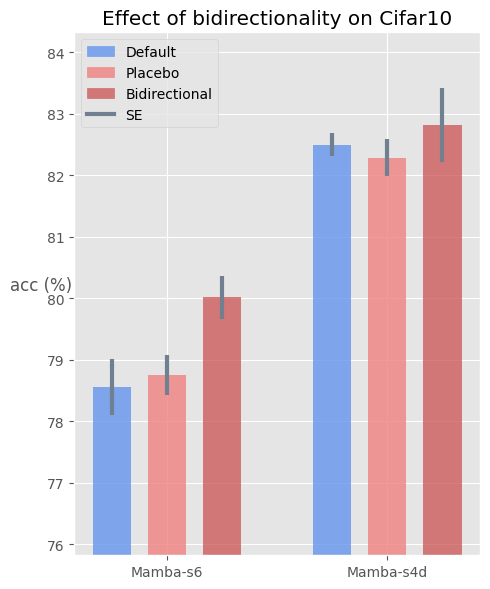

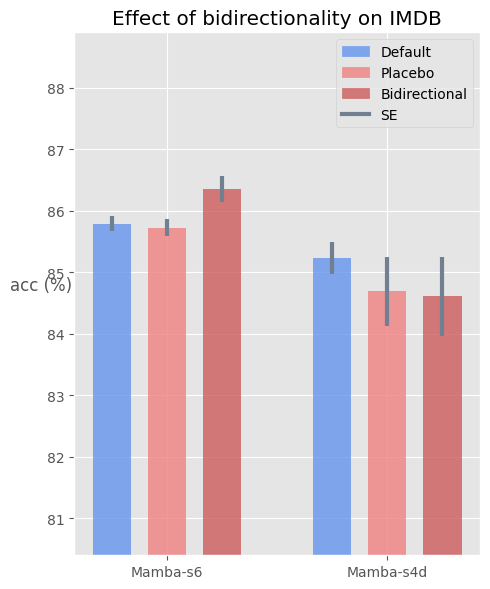

In [114]:
plt.style.use("ggplot")

def bi_dir_plot(dataset="CIFAR10_cons_bi_v3_val.csv", ci=1):
   df = pd.read_csv("data/exp3/"+dataset)
   df.head()
   df[df == "MambaModel_s6_bi"] = "MambaModel_s6_BIMODULE"
   df[df == "MambaModel_diagsequential_bi"] = "MambaModel_diag_BIMODULE"
   
   order = ["MambaModel_s6", "MambaModel_s6_BIMODULE_placebo", "MambaModel_s6_BIMODULE",
            "MambaModel_diag", "MambaModel_diag_BIMODULE_placebo", "MambaModel_diag_BIMODULE"]
   
   c = -1
   alpha = 0.8
   colors = ["cornflowerblue", "lightcoral", "indianred"]
   colors = colors + [None] + colors
   mean_avg = 0
   plt.figure(figsize=(5,6))   
   for model in order:
      c+=1
      if c == 3: c+=1
      d = df[df.Name==model]["test acc"].values
      mean = d.mean()*100
      mean_avg += mean
      std = d.std()*100
      plt.bar(c, mean, color=colors[c], width=0.7, alpha=alpha)
      plt.vlines(c, mean-ci*std, mean+ci*std, linewidth=3, color="slategray")
   
   
   import matplotlib.patches as mpatches
   from matplotlib.lines import Line2D
   
   red_patch = [
              mpatches.Patch(color='cornflowerblue', label='Default', alpha=alpha),
              mpatches.Patch(color='lightcoral', label='Placebo', alpha=alpha),
              mpatches.Patch(color='indianred', label='Bidirectional', alpha=alpha),
              Line2D([0],[0],color='slategray', label='SE', linewidth=3),
             ]
   plt.ylim(mean_avg/6-5, mean_avg/6+3.5)
   plt.legend(handles=red_patch, ncol=1);
   plt.ylabel("acc (%)", rotation=0)
   dataset_name = "IMDB" if "IMDB" in dataset else "Cifar10"
   plt.title(f"Effect of bidirectionality on {dataset_name}")
   plt.xticks([1,5], ["Mamba-s6", "Mamba-s4d"]);
   plt.tight_layout()
   plt.savefig(f"data/exp3/bi_{dataset_name}.png", dpi=200)
   plt.show()
   
   
bi_dir_plot()
bi_dir_plot(dataset="IMDBtoken_bi_v3_val.csv")